In [1]:
import datasets
import os
train_dataset=datasets.load_dataset("imagefolder",data_dir='FFHQ/512',split='train',drop_labels=True)

/home/csh/anaconda3/envs/mpytorch/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
print(train_dataset)
print(train_dataset[0])
print(train_dataset['image'])

Dataset({
    features: ['image'],
    num_rows: 2
})
{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512 at 0x7F3C1497E8C0>}
[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512 at 0x7F3C149BBDC0>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512 at 0x7F3C15488670>]


In [3]:
from aaa import get_lq_img
import yaml
opt=yaml.load(open('/home/Code/Semester-Project/data_opt.yaml','r'),Loader=yaml.FullLoader)
print(opt)
tmp_dataset=get_lq_img(opt,train_dataset)

{'image_folder': '/scratch/students/2024-fall-shuhua/dataset/FFHQ/512', 'log_folder': '/scratch/students/2024-fall-shuhua/code/sp/logs', 'mean': [0.5, 0.5, 0.5], 'std': [0.5, 0.5, 0.5], 'out_size': 512, 'blur_kernel_size': 41, 'kernel_list': ['iso', 'aniso'], 'kernel_prob': [0.5, 0.5], 'blur_sigma': [0.1, 10], 'downsample_range': [0.8, 8], 'noise_range': [0, 20], 'jpeg_range': [60, 100], 'color_jitter_prob': 0.3, 'color_jitter_shift': 20, 'color_jitter_pt_prob': 0.3, 'use_hflip': True, 'use_vflip': False}


In [4]:
print(tmp_dataset[0]['image'].shape)

torch.Size([3, 512, 512])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


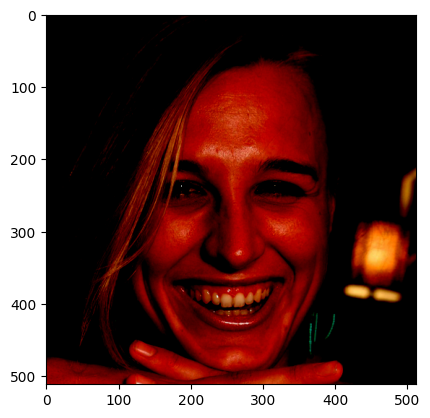

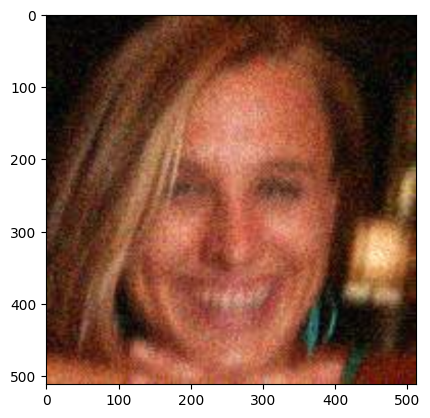

In [6]:
import matplotlib.pyplot as plt
import torch
from PIL import Image
imgs=tmp_dataset[0]
#3*h*w->h*w*3,rgb->bgr
hq_img = imgs['image'].permute(1, 2, 0)
#hq_img=torch.flip(hq_img, dims=[-1])
lq_img=imgs['lq_image'].permute(1, 2, 0)
# Convert lq_img to a PIL Image and save as PNG
lq_img_pil = Image.fromarray((lq_img.numpy() * 255).astype('uint8'))
lq_img_pil.save('/home/Code/Semester-Project/ControlNeXt-SDXL-Training/examples/vidit_depth/condition_0.png')



plt.imshow(hq_img)
plt.show()
plt.imshow(lq_img)
plt.show()